# Clustering insurance data 

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline 

### Reading data

In [2]:
data = pd.read_csv('./Clustering/Insurance_Dataset_Clustering_Analysis.csv')
data.dtypes

Policy Number                   int64
Age                             int64
Age Band                       object
Years of Driving Experience     int64
Number of Vehicles              int64
Gender                         object
Gender Dummy                    int64
Married                        object
Married Dummy                   int64
Vehicle Age                     int64
Vehicle Age Band               object
Fuel Type                      object
Fuel Type Dummy                 int64
Losses                          int64
Count                           int64
Capped Losses                   int64
dtype: object

In [3]:
import datacleaner

In [4]:
data1 = datacleaner.autoclean(data)

In [36]:
data2 = data1[['Age Band','Years of Driving Experience','Number of Vehicles','Gender Dummy','Married Dummy','Vehicle Age Band','Fuel Type Dummy','Capped Losses']]

In [37]:
data2.head()

,Age Band,Years of Driving Experience,Number of Vehicles,Gender Dummy,Married Dummy,Vehicle Age Band,Fuel Type Dummy,Capped Losses
0,0,5,1,1,0,1,0,203
1,1,10,1,0,1,2,0,402
2,1,37,1,1,0,0,1,553
3,1,31,1,0,0,1,0,292
4,0,3,1,1,1,1,0,247


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 8 columns):
Age Band                       15290 non-null int32
Years of Driving Experience    15290 non-null int64
Number of Vehicles             15290 non-null int64
Gender Dummy                   15290 non-null int64
Married Dummy                  15290 non-null int64
Vehicle Age Band               15290 non-null int32
Fuel Type Dummy                15290 non-null int64
Capped Losses                  15290 non-null int64
dtypes: int32(2), int64(6)
memory usage: 836.2 KB


In [7]:
X = data2.values
X

array([[  0,   5,   1, ...,   1,   0, 203],
       [  1,  10,   1, ...,   2,   0, 402],
       [  1,  37,   1, ...,   0,   1, 553],
       ..., 
       [  2,  51,   4, ...,   1,   0, 282],
       [  0,   4,   4, ...,   2,   1, 822],
       [  0,   2,   4, ...,   0,   0, 407]], dtype=int64)

In [31]:
km = KMeans(n_clusters=3)
labels = km.fit_predict(X)

In [ ]:
from sklearn.decomposition import PCA

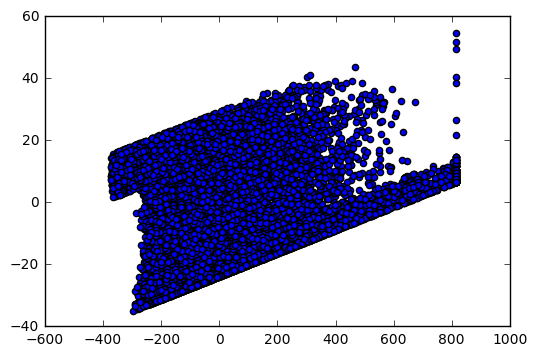

In [28]:
pca = PCA(n_components=2)

x = pca.fit_transform(X)

plt.scatter(x[:,0],x[:,1])

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.583423700705


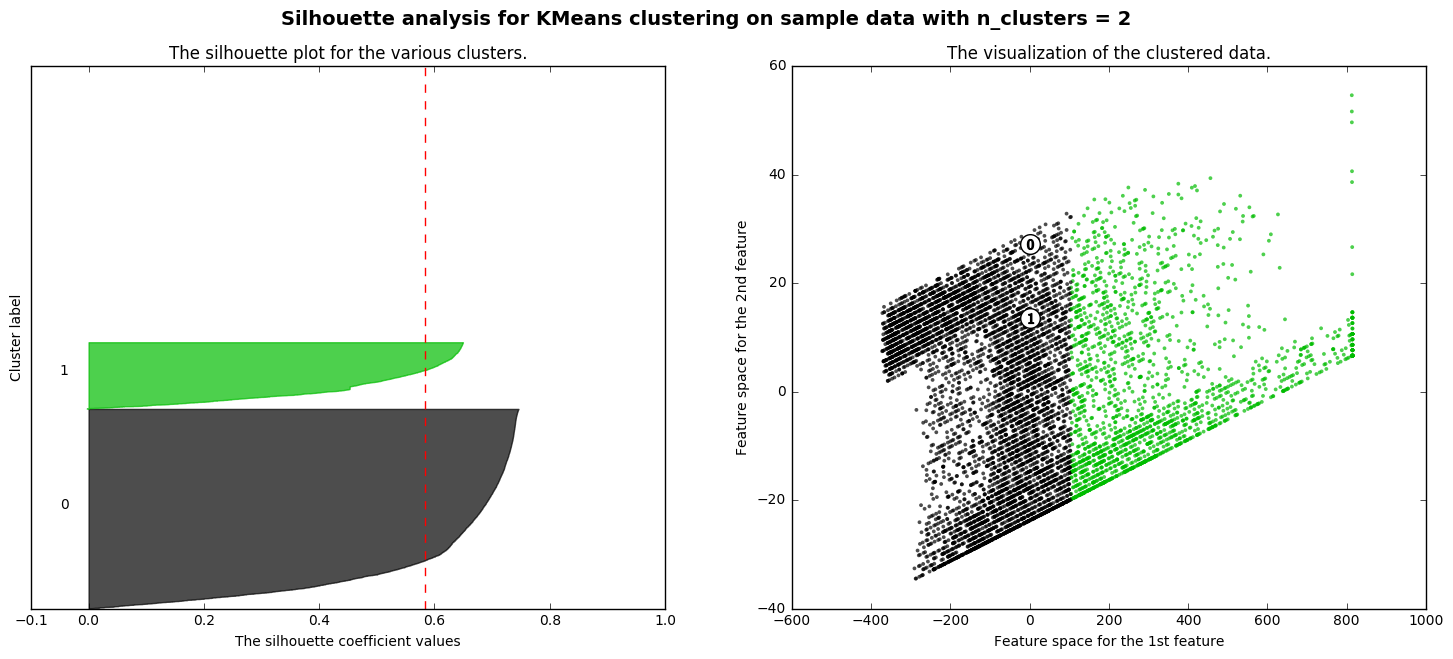

For n_clusters = 3 The average silhouette_score is : 0.533713095967


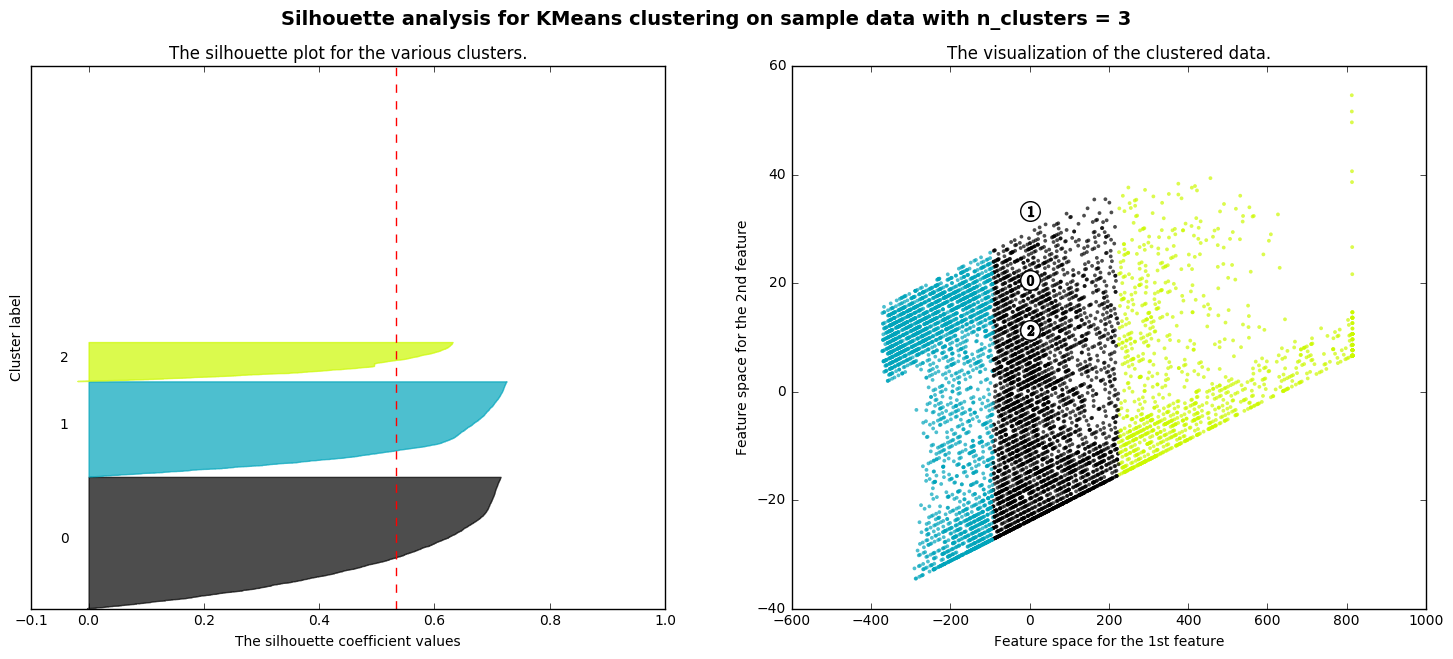

For n_clusters = 4 The average silhouette_score is : 0.544466941344


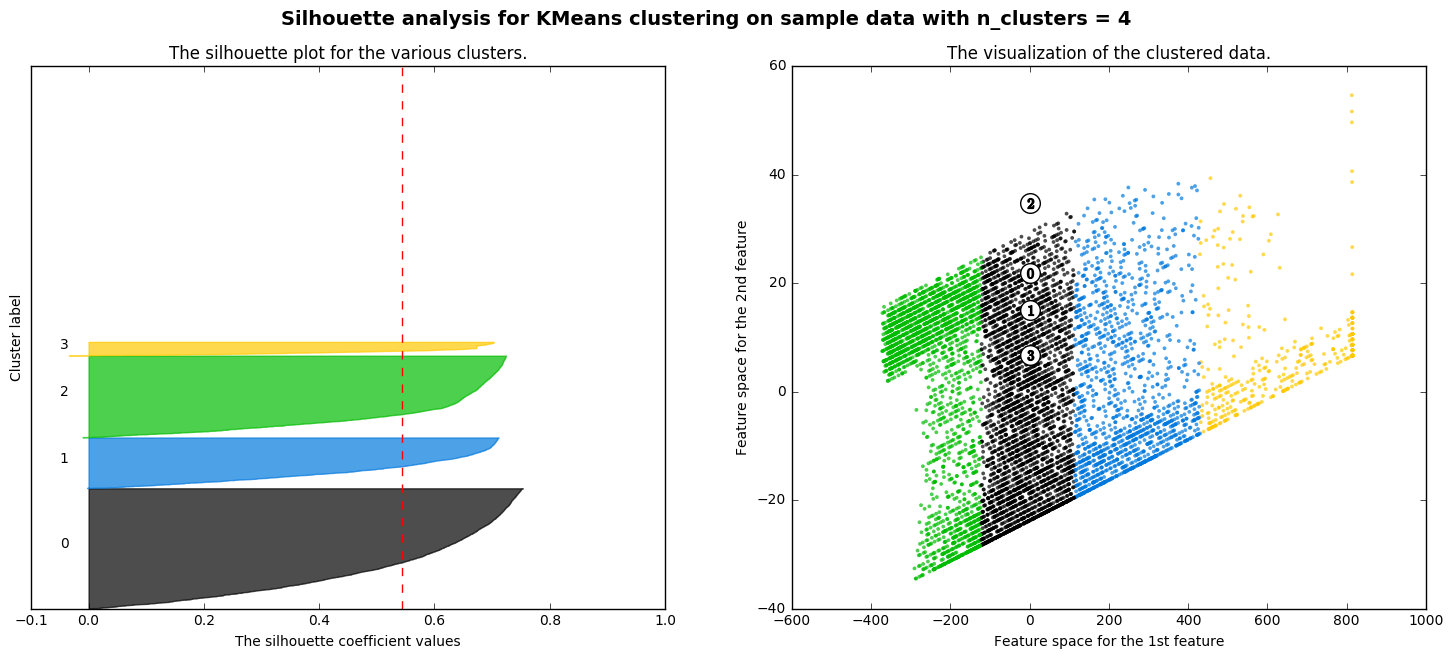

For n_clusters = 5 The average silhouette_score is : 0.511097066937


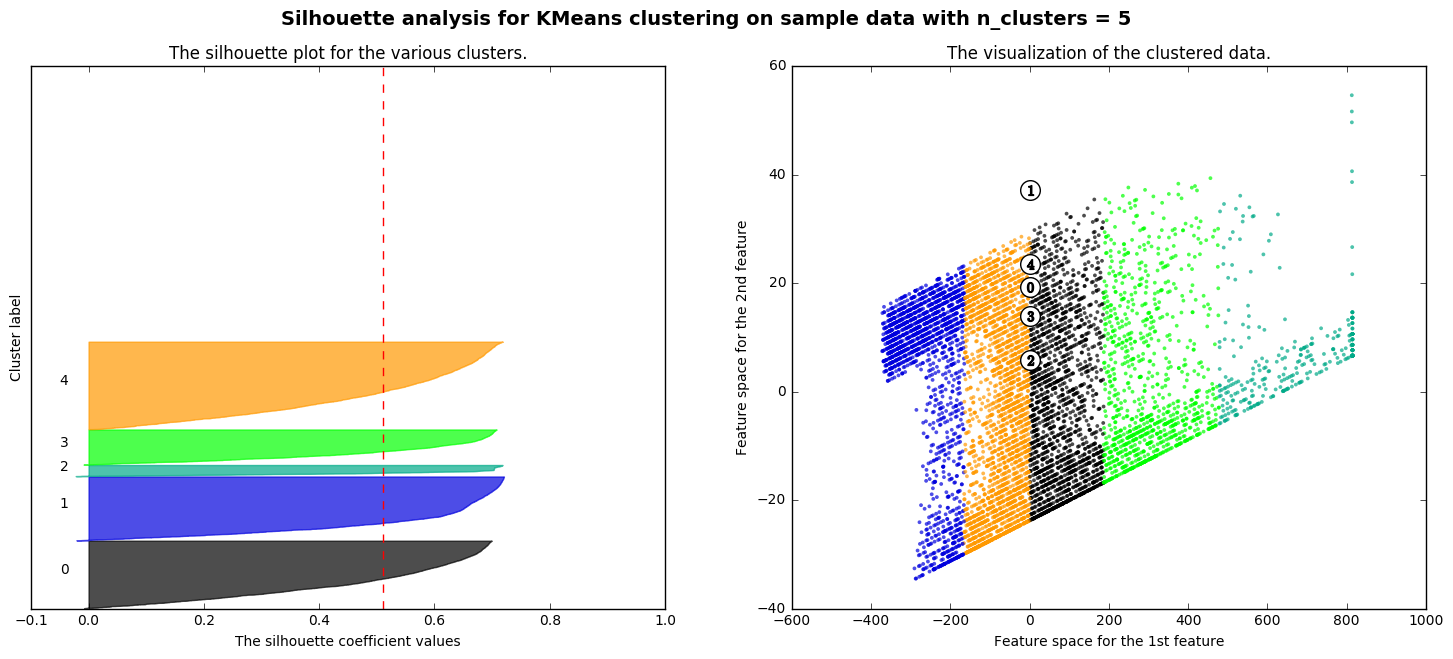

For n_clusters = 6 The average silhouette_score is : 0.496412959983


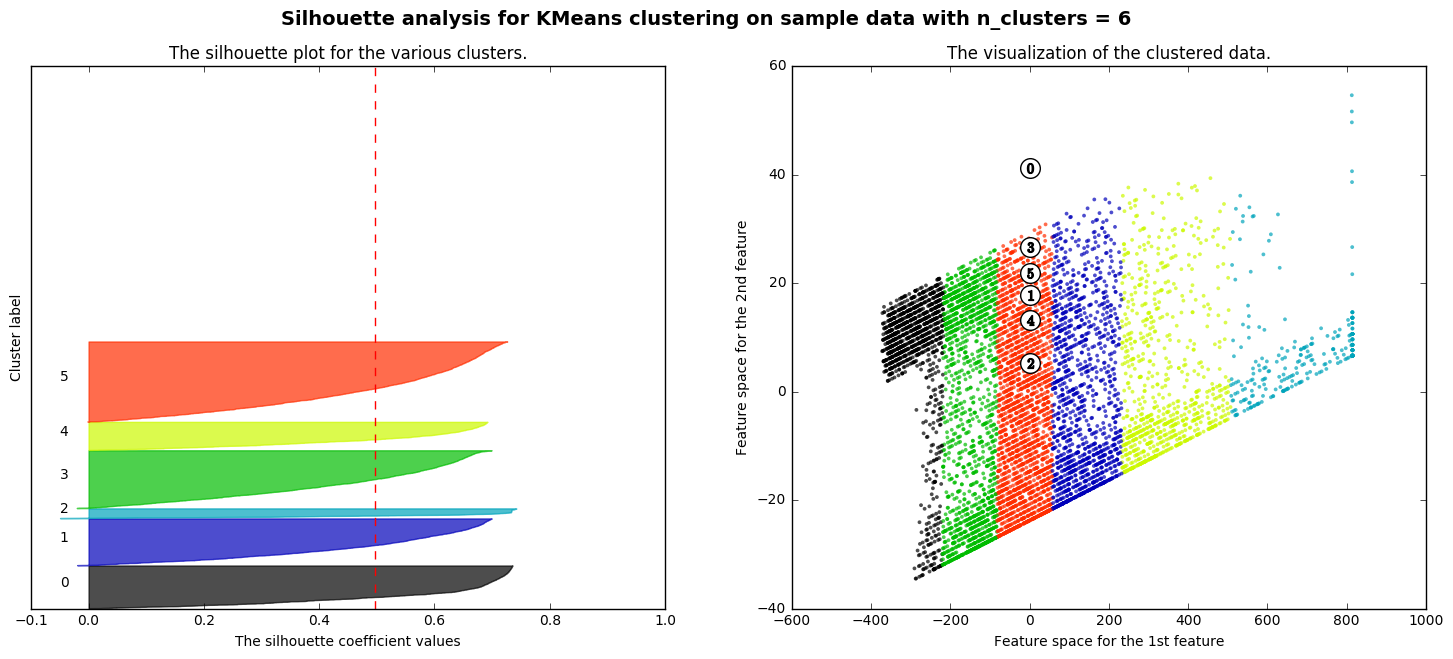

In [30]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = data2.values   # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X[:7500], cluster_labels[:7500])
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X[:7500], cluster_labels[:7500])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels[:7500] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:7500, 0], x[:7500, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()